In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
color = sns.color_palette()

## Load, Clean & EDA

In [73]:
uber = pd.read_csv("churn.csv")
uber.head()
#some description of dataset
#surge means: 
#the price will increase during rush hours. surge pricing depends on
#the location of pickup. when driver receive a pickup request from a surging area,
#the trip requests a surge multiplier.(1.3X, 2.1X), the multiplier applies on the 
#base, time, distance, fare but not on cancellation fee, tolls,...
#surge_pct: the precent of trips taken with surge multiplier

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [14]:
print(uber.info())
#shows avg_rate_by_driver/avg_rate_of_driver/phone have nan values
print(uber.describe())
#count how many missing value in each variable
print(uber.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
luxury_car_user           50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB
None
           avg_dist  avg_rating_by_driver  avg_rating_of_driver     avg_surge  \
count  50000.000000          49799.000000          41878.000000  50000.000000   
mean       5.796827              4.778158              4.601559      1.074

In [76]:
#change date variables into date type
def parse_date(date):
    if date == "":
        return None
    else:
        return dt.strptime(date, "%Y-%m-%d")
    
    
uber['last_trip_date'] = pd.to_datetime(uber['last_trip_date'], format='%Y-%m-%d')
uber['signup_date'] = pd.to_datetime(uber['signup_date'], format ='%Y-%m-%d')

In [16]:
uber.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [5]:
#explore data
#1.numeric variables
#group variables by their type
uber_type = uber.columns.to_series().groupby(uber.dtypes).groups
uber_type

{dtype('float64'): Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
        'surge_pct', 'weekday_pct'],
       dtype='object'),
 dtype('<M8[ns]'): Index(['last_trip_date', 'signup_date'], dtype='object'),
 dtype('bool'): Index(['luxury_car_user'], dtype='object'),
 dtype('int64'): Index(['trips_in_first_30_days'], dtype='object'),
 dtype('O'): Index(['city', 'phone'], dtype='object')}

avg_dist
avg_rating_by_driver
avg_rating_of_driver
avg_surge
city
last_trip_date
phone
signup_date
surge_pct
trips_in_first_30_days
luxury_car_user
weekday_pct


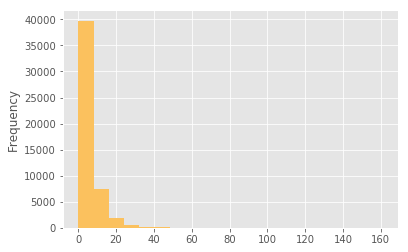

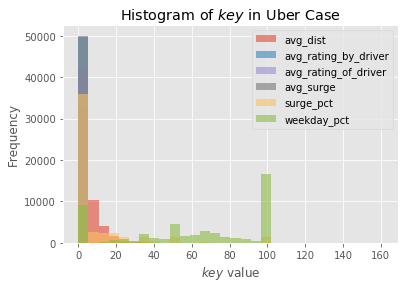

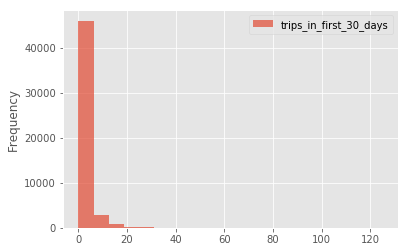

In [6]:

for key, value in uber_type.items():
    fig= plt.figure()
    if key == "float64":
        uber[value].plot.hist(bins = 30, alpha = 0.6)
        plt.xlabel("$key$ value")
        plt.title(r"Histogram of $key$ in Uber Case")
    if key =='int64':
        uber[value].plot.hist(bins = 20, alpha = 0.7)
        #plt.xlabel("value")
        #plt.title(r"Histogram of numerical variables in Uber Case")
############


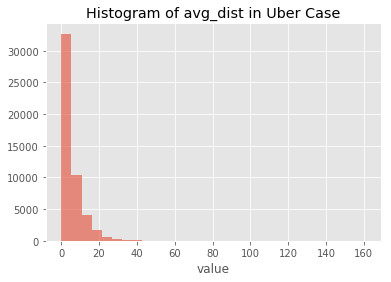

In [12]:
#since not all the variables are in the same scaler, shows them in one plot is confusing
fig = plt.figure()
plt.hist(uber['avg_dist'],bins = 30, alpha = 0.6)
plt.xlabel("value")
plt.title(r"Histogram of avg_dist in Uber Case")

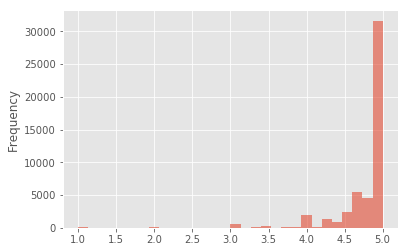

In [13]:
uber['avg_rating_by_driver'].plot.hist(bins = 30, alpha = 0.6)

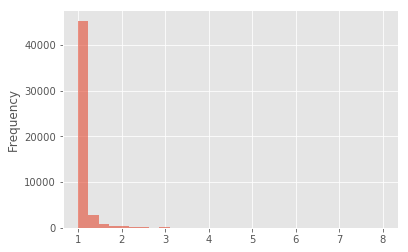

In [15]:
uber['avg_surge'].plot.hist(bins = 30, alpha = 0.6)


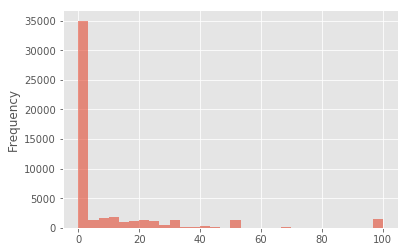

In [16]:
uber['surge_pct'].plot.hist(bins = 30, alpha = 0.6)


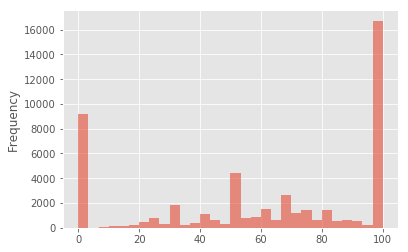

In [17]:
uber['weekday_pct'].plot.hist(bins = 30, alpha = 0.6)

Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64


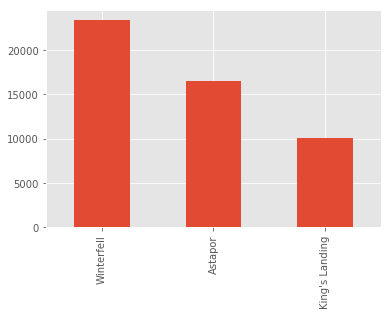

In [18]:
#categorical variables
print(uber['city'].value_counts())
uber['city'].value_counts().plot.bar()

iPhone     34582
Android    15022
Name: phone, dtype: int64


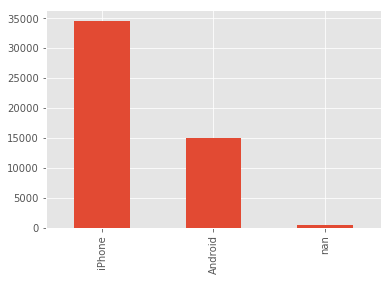

In [19]:
print(uber['phone'].value_counts())
uber['phone'].value_counts(dropna = False).plot.bar()
#we can know rider use iphone much more than riders who use android

False    31146
True     18854
Name: luxury_car_user, dtype: int64


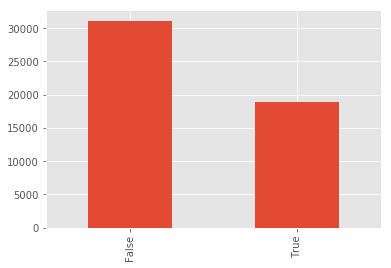

In [20]:
print(uber['luxury_car_user'].value_counts())
uber['luxury_car_user'].value_counts().plot.bar()
#majority rider prefer normal car

In [21]:
#dealing with missing data
print(uber.isnull().sum())

avg_dist                     0
avg_rating_by_driver       201
avg_rating_of_driver      8122
avg_surge                    0
city                         0
last_trip_date               0
phone                      396
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
luxury_car_user              0
weekday_pct                  0
dtype: int64


In [22]:
#The esaiest and rudest way is to just drop all rows that having missing values
uber_dropna = uber.dropna(axis = 0)
print(uber_dropna.info())
print(uber_dropna.describe())
#it seems like about 4000 rows contains missing value.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41445 entries, 0 to 49998
Data columns (total 12 columns):
avg_dist                  41445 non-null float64
avg_rating_by_driver      41445 non-null float64
avg_rating_of_driver      41445 non-null float64
avg_surge                 41445 non-null float64
city                      41445 non-null object
last_trip_date            41445 non-null datetime64[ns]
phone                     41445 non-null object
signup_date               41445 non-null datetime64[ns]
surge_pct                 41445 non-null float64
trips_in_first_30_days    41445 non-null int64
luxury_car_user           41445 non-null bool
weekday_pct               41445 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 3.8+ MB
None
           avg_dist  avg_rating_by_driver  avg_rating_of_driver     avg_surge  \
count  41445.000000          41445.000000          41445.000000  41445.000000   
mean       5.460046              4.7764

In [78]:
#The SECOND WAY is to filling missing data 
uber_fillna = uber.copy()
print(uber_fillna.info())
#filling for phone as an example(categorical>>give a new category)
uber_fillna['phone'] = uber['phone'].fillna('no_phone')
#Filling missin value for rate(continuous>>use mean/median)
#if there is large obvious relationship with filling_na variables and others, better fill
#according to other non_missing values
uber_fillna['avg_rating_by_driver'] = uber_fillna['avg_rating_by_driver'].fillna(uber_fillna['avg_rating_by_driver'].median()) 
uber_fillna['avg_rating_of_driver'] = uber_fillna['avg_rating_of_driver'].fillna(uber_fillna['avg_rating_of_driver'].median())
#but in this case, the rating seems have nothing to do with other features, maybe can check the correlations later
print(uber_fillna.info())
print(uber_fillna.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     49604 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
luxury_car_user           50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 4.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null fl

it seems filled data is better than droped data, because it contains more information 
Now we can do some feature engineering and segmentation, first based on the Time series data first

            last_trip_date  count
signup_date                      
2014-01-25      2014-06-17      1
2014-01-29      2014-05-05      1
2014-01-06      2014-01-07      1
2014-01-10      2014-06-29      1
2014-01-27      2014-03-15      1
signup_date
2014-01-01    1737
2014-01-02    1004
2014-01-03    1213
2014-01-04    1485
2014-01-05    1343
Freq: D, Name: count, dtype: int64


'\nWe can find from the plot, there is obvious pattern of signup numbers. The intervals between\neach peaks are almost 7 days, checking the calander, we find those peak dates are almost all Saturdays, while\nthe vellys are between Monday to Wednesday. It seems reasonable, because people will routinely commute through \nspecific transportations like train/subway during weekdays, they are more likely take Uber during Weekends when they need to \ngo out.\n'

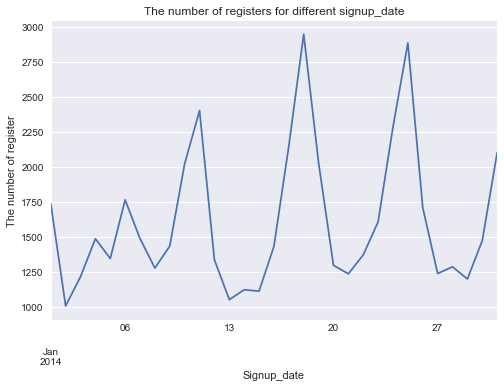

In [5]:
#Time series variables

#Since there are signup_date, last_trip_date as datetime, we can use these as index
#construct a new df to do experiment on the time-series
uber_time = uber[['last_trip_date','signup_date']].copy()
uber_time['count'] = 1
#print(uber_time)
#use signup_date as index, then check the relationship with last_trip_time
uber_time = uber_time.set_index('signup_date')
print(uber_time.head())
#now order it by date
print(uber_time['count'].resample('1D').sum().head())
uber_time['count'].resample('1D').sum().plot()
plt.xlabel('Signup_date')
plt.ylabel('The number of register')
plt.title('The number of registers for different signup_date')
#get the day of week
#pd.to_datetime('2014-06-20').dayofweek

We can find from the plot, there is obvious pattern of signup numbers. The intervals between
each peaks are almost 7 days, checking the calander, we find those peak dates are almost all Saturdays, while
the vellys are between Monday to Wednesday. It seems reasonable, because people will routinely commute through 
specific transportations like train/subway during weekdays, they are more likely take Uber during Weekends when they need to 
go out.

"\nwe can find the higher probability of last_trip happens either within one month, or around 6 months for customers.\nSince we only focus on records of Jan-signup-customer, these patterns means many customers didn't take Uber any \nmore within one month after they signed up. And there is an increase in June of last trip, that means plenty of people\nstill usin Uber, and they might continue using after June(after the data we recorded)\n"

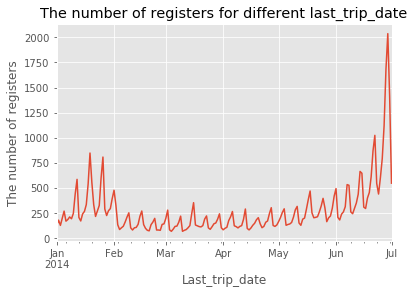

In [6]:
#we can also use last_trip_date as index, to check the population distribution of final trip  
uber_time = uber_time.set_index('last_trip_date')
uber_time['count'].resample('1D').sum().plot()
#print(uber_time["count"].resample("1D").sum())
plt.xlabel('Last_trip_date')
plt.ylabel('The number of registers')
plt.title('The number of registers for different last_trip_date')

we can find the higher probability of last_trip happens either within one month, or around 6 months for customers.
Since we only focus on records of Jan-signup-customer, these patterns means many customers didn't take Uber any 
more within one month after they signed up. And there is an increase in June of last trip, that means plenty of people
still usin Uber, and they might continue using after June(after the data we recorded)

In [79]:
#create a new variable for day of week for signup_date
#but .dayofweek is for a single string, so use apply
uber_fillna['signup_dow'] = uber_fillna['signup_date'].apply(lambda x: x.dayofweek)
uber_fillna.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,signup_dow
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,5
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,2
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,4
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0


Then, we can segment data by other variables, like city, phone type, luxury car type


In [6]:

#check how measurements vary in different dow
dow_info = uber_fillna.groupby('signup_dow')
print("Groupby_dow")
print(dow_info.mean())
#check how measurements vary in different city
city_info = uber_fillna.groupby('city')
#city_info.apply(lambda x: x.astype('float64'))
print("Groupby_city")
print(city_info.mean())
#check how measurements vary in different phone type
print('Groupby_phone')
print(uber_fillna.groupby('phone').mean())


Groupby_dow
            avg_dist  avg_rating_by_driver  avg_rating_of_driver  avg_surge  \
signup_dow                                                                    
0           6.008795              4.784166              4.650533   1.064900   
1           5.977492              4.774180              4.657533   1.060316   
2           6.236379              4.787694              4.655144   1.065973   
3           6.105506              4.785328              4.652210   1.066157   
4           5.519604              4.770462              4.649053   1.080023   
5           5.268069              4.779516              4.640062   1.091406   
6           5.906819              4.775238              4.652581   1.079780   

            surge_pct  trips_in_first_30_days  luxury_car_user  weekday_pct  
signup_dow                                                                   
0            7.654277                2.573648         0.374883    71.556878  
1            7.163349                2.520

"\nFor different signup_dow, there seems not so much difference between each values, only the surge_pct is extremely higher in Saturday\nWhile...from the numbers it's really hard to tell the difference, let do some visualization\n"

For different signup_dow, there seems not so much difference between each values, only the surge_pct is extremely higher in Saturday
While...from the numbers it's really hard to tell the difference, let do some visualization

##### plot based on grouped result

In [ ]:
#plot them
# fig, ax = plt.subplots()
# index = ['Astapor', "King's Landing", 'Winterfell']
# bar_width = 0.85
# rects1 = plt.bar(index, city_info, bar_width,
#                  color='b')

'''
DataFrameGroupBy.plot(data, x=None, y=None, kind='line', ax=None, 
subplots=False, sharex=None, sharey=False, layout=None, figsize=None, 
use_index=True, title=None, grid=None, legend=True, style=None, 
logx=False, logy=False, loglog=False, xticks=None, yticks=None, 
xlim=None, ylim=None, rot=None, fontsize=None, colormap=None, 
table=False, yerr=None, xerr=None, secondary_y=False, sort_columns=False, **kwds)
'''
city_info[["avg_dist", "avg_rating_by_driver", "avg_rating_of_driver"]].plot(kind = 'bar')

city
Astapor           Axes(0.125,0.125;0.775x0.755)
King's Landing    Axes(0.125,0.125;0.775x0.755)
Winterfell        Axes(0.125,0.125;0.775x0.755)
dtype: object

In [111]:
city_info.index

Index(['Astapor', 'King's Landing', 'Winterfell'], dtype='object', name='city')

In [101]:
#converting categorical variables(city, phone, luxury_car_user, signup_dow)
uber_fillna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     50000 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
luxury_car_user           50000 non-null bool
weekday_pct               50000 non-null float64
signup_dow                50000 non-null int64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(2), object(2)
memory usage: 4.6+ MB


In [7]:
#change boolean into num
uber_fillna['luxury_car_user'] = uber_fillna['luxury_car_user'].astype(int)
uber_fillna.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,signup_dow
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,1,46.2,5
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,0,50.0,2
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,0,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,1,80.0,4
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,0,82.4,0


In [49]:
#change categorical variables into dummy variables(since either the number of their values are no more than
#10, so it is OK to apply one-hot coding skills, but for categorical variables which contains many values,
#using one-hot coding isn't a wise way)
col_category = ['signup_dow', 'city', 'phone']
uber_dummy = pd.get_dummies(uber_fillna[col_category], columns = col_category)
print(uber_dummy.head())
uber_fillna_dummy = uber_fillna.join(uber_dummy)
print(uber_fillna_dummy.head())
print(uber_fillna_dummy.columns)

   signup_dow_0  signup_dow_1  signup_dow_2  signup_dow_3  signup_dow_4  \
0             0             0             0             0             0   
1             0             0             1             0             0   
2             1             0             0             0             0   
3             0             0             0             0             1   
4             1             0             0             0             0   

   signup_dow_5  signup_dow_6  city_Astapor  city_King's Landing  \
0             1             0             0                    1   
1             0             0             1                    0   
2             0             0             1                    0   
3             0             0             0                    1   
4             0             0             0                    0   

   city_Winterfell  phone_Android  phone_iPhone  phone_no_phone  
0                0              0             1               0  
1       

In [56]:
#save the cleaned data to csv file
selected_cols = ['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'last_trip_date', 'signup_date', 'surge_pct',
       'trips_in_first_30_days', 'luxury_car_user', 'weekday_pct',
       'churn', 'signup_dow_0', 'signup_dow_1',
       'signup_dow_2', 'signup_dow_3', 'signup_dow_4', 'signup_dow_5',
       'signup_dow_6', 'city_Astapor', "city_King's Landing",
       'city_Winterfell', 'phone_Android', 'phone_iPhone', 'phone_no_phone']
uber_fillna_dummy = uber_fillna_dummy[selected_cols]
uber_fillna_dummy.head()
cleaned_uber = 'cleaned_uber.csv'
uber_fillna_dummy.to_csv(cleaned_uber, index = False)

## Setting Churn/Active Label

After cleaning, imputing and simply explore Uber Rider features, we can go to next stage 
Since our task is to analyze and then predict the churn rate of Uber Rider, the only infomation
we have about churn is the last_trip_date. So how to decide whether the rider is churn or not
depends on our business sense and some research analysis.
Since our time interval is around 6 months(from Jan to July), we first assume that if one user 
didn't use Uber after June is Churn, and users still use Uber in June are Active.

In [8]:
uber_fillna['churn'] = (uber_fillna.last_trip_date < pd.to_datetime('2014-06-01'))*1
uber_fillna['active'] = (uber_fillna.last_trip_date >= pd.to_datetime('2014-06-01'))*1
print(uber_fillna.head())
print('Churn Rate:', uber_fillna['churn'].mean())
print('Active Rate:', uber_fillna['active'].mean())
#as we can see, more than 60% riders didn't use Uber after June, next explore 
#the relationship between churn and those features

   avg_dist  avg_rating_by_driver  avg_rating_of_driver  avg_surge  \
0      3.67                   5.0                   4.7       1.10   
1      8.26                   5.0                   5.0       1.00   
2      0.77                   5.0                   4.3       1.00   
3      2.36                   4.9                   4.6       1.14   
4      3.13                   4.9                   4.4       1.19   

             city last_trip_date    phone signup_date  surge_pct  \
0  King's Landing     2014-06-17   iPhone  2014-01-25       15.4   
1         Astapor     2014-05-05  Android  2014-01-29        0.0   
2         Astapor     2014-01-07   iPhone  2014-01-06        0.0   
3  King's Landing     2014-06-29   iPhone  2014-01-10       20.0   
4      Winterfell     2014-03-15  Android  2014-01-27       11.8   

   trips_in_first_30_days  luxury_car_user  weekday_pct  signup_dow  churn  \
0                       4                1         46.2           5      0   
1             

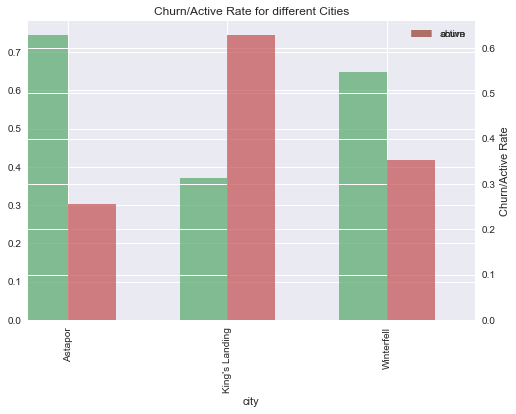

In [56]:
uber_category = ['city', 'phone', 'trips_in_first_30_days', 'luxury_car_user']
fig=plt.figure()
ax = fig.add_subplot(111)
ax2 = ax.twinx()
ax3 = ax.
uber_fillna['city'].value_counts().plot.bar(color = color[3], ax = ax3, width=0.3, alpha = 0.7, position = 2)
uber_fillna[['city', 'churn']].groupby(['city']).mean().plot.bar(color = color[1], ax = ax, width=0.3, alpha = 0.7, position = 1)
uber_fillna[['city', 'active']].groupby(['city']).mean().plot.bar(color = color[2], ax= ax2, width = 0.3, alpha = 0.7, position = 0)
plt.ylabel("Churn/Active Rate")
plt.title("Churn/Active Rate for different Cities")


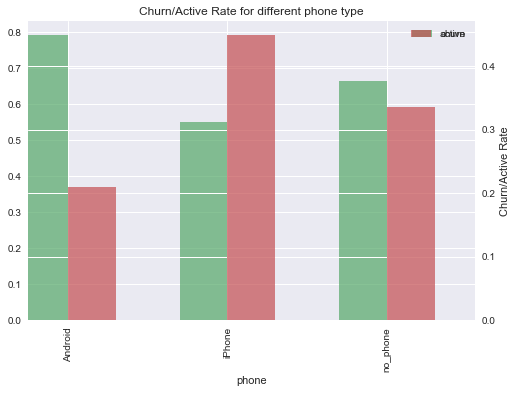

In [43]:
fig=plt.figure()
ax = fig.add_subplot(111)
ax2 = ax.twinx()
uber_fillna[['phone', 'churn']].groupby(['phone']).mean().plot.bar(color = color[1], ax = ax, width=0.3, alpha = 0.7, position = 1)
uber_fillna[['phone', 'active']].groupby(['phone']).mean().plot.bar(color = color[2], ax= ax2, width = 0.3, alpha = 0.7, position = 0)
plt.ylabel("Churn/Active Rate")
plt.title("Churn/Active Rate for different phone type")
#Android user are much more likely be churn than IPhone user, which indicates there might be something
#not that satisfied for Android user. Uber need to improve their performance in Android system

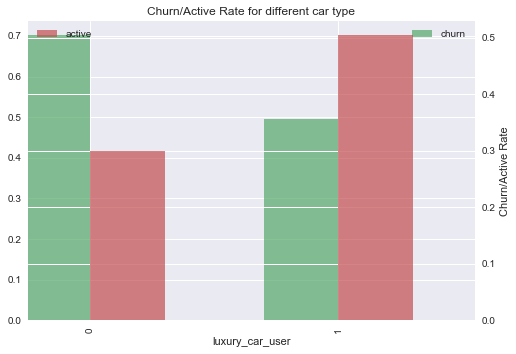

In [42]:
fig=plt.figure()
ax = fig.add_subplot(111)
ax2 = ax.twinx()
uber_fillna[['luxury_car_user', 'churn']].groupby(['luxury_car_user']).mean().plot.bar(color = color[1], ax = ax, width=0.3, alpha = 0.7, position = 1)
uber_fillna[['luxury_car_user', 'active']].groupby(['luxury_car_user']).mean().plot.bar(color = color[2], ax= ax2, width = 0.3, alpha = 0.7, position = 0)
plt.ylabel("Churn/Active Rate")
plt.title("Churn/Active Rate for different car type")
#we can find rider who prefer luxury car are less likely be churn

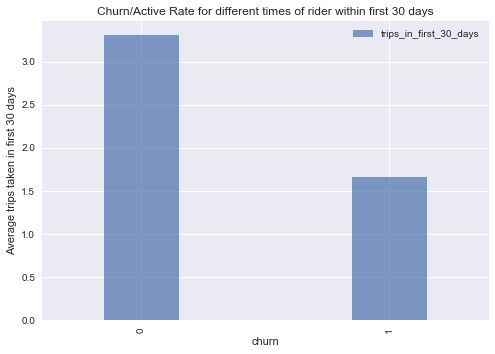

In [47]:
uber_fillna[['trips_in_first_30_days', 'churn']].groupby(['churn']).mean().plot.bar(width=0.3, alpha = 0.7)

plt.ylabel("Average trips taken in first 30 days")
plt.title("Churn/Active Rate for different times of rider within first 30 days")
#we can tell that riders who use Uber within first 30 days are much less likely be churn
#after 6 month

In [9]:
is_churn = uber_fillna['churn'] == 1

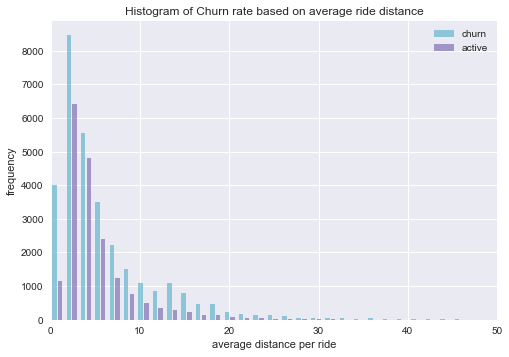

In [41]:
#find the relationship between churn/active and avg_distance
fig, ax = plt.subplots()
plt.style.use('seaborn-deep')
#act = uber_fillna[is_active]['avg_dist'].values
#ax[1].hist(uber_fillna[~is_active]['avg_dist'].values)
plt.hist([uber_fillna[is_churn]['avg_dist'].values, uber_fillna[~is_churn]['avg_dist'].values],
         color = [color[5], color[3]], alpha = 0.7, bins = 100, width = 0.5, label = ['churn', 'active'])
plt.xlabel("average distance per ride")
#there are some outliers need to be dropped, so in this time, set the x axis limit as 80%
plt.xlim([0, 50])
plt.ylabel("frequency")
plt.title("Histogram of Churn rate based on average ride distance")
plt.legend(loc = "upper right")
plt.show()

In [46]:
#plot other variables
def hist_active_churn(df, col_name):
    is_churn = df['churn'] ==1
    fig, ax = plt.subplots()
    #act = uber_fillna[is_active]['avg_dist'].values
    #ax[1].hist(uber_fillna[~is_active]['avg_dist'].values)
    plt.hist([uber_fillna[is_churn][col_name].values, uber_fillna[~is_churn][col_name].values],
             color = [color[2], color[5]], alpha = 0.7, bins = 7, width = 0.5, label = ['churn', 'active'])
    plt.xlabel(col_name)
    #plt.xlim([0, 50])
    plt.ylabel("frequency")
    plt.title("Histogram of Churn rate based on %s" %col_name)
    plt.legend(loc = "upper right")
    #add values of each bin as label
    rects = ax.patches
    #for each bin, place a label
    for rect in rects:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width()/2
        space = 5
        va = "bottom"
        label = "{:.1f}".format(y_value)
        #create annotation
        plt.annotate(
            label,
            (x_value, y_value),
            xytext = (0, space),
            textcoords = "offset points",
            ha = "center", 
            va = va)
    plt.show()

In [12]:
uber_fillna.columns

Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'city', 'last_trip_date', 'phone', 'signup_date', 'surge_pct',
       'trips_in_first_30_days', 'luxury_car_user', 'weekday_pct',
       'signup_dow', 'churn', 'active'],
      dtype='object')

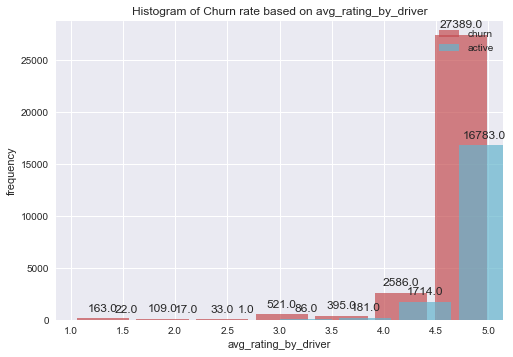

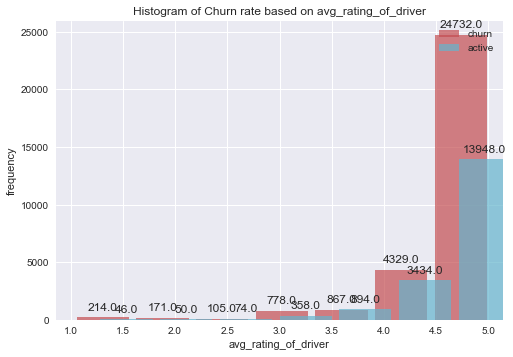

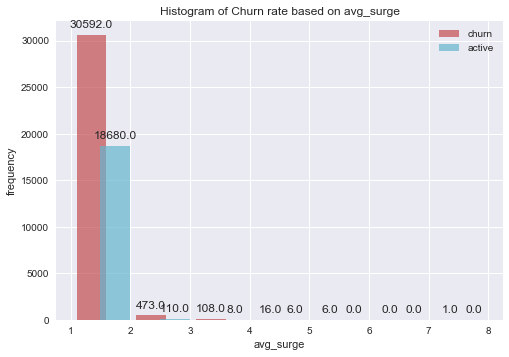

In [47]:
uber_continuous = ['avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge']
for col in uber_continuous:
    hist_active_churn(uber_fillna, col_name = col)

Although the numbers of average rate of/by driver of churn are higher than that of active, but that is because the churn precentage is also half more than active percentage. But we still can find some evidence that cause churn.
we know churn/active = 0.62/0.37 = 1.7
we can see the "avg_rating_by_driver" is almost 1.7 in score 5, but for lower score, the number of churn rider are much more larger than the number of active rider, which indicate that churn rider are more disliked by driver(they might have some argues with dirver) bad riding experience results in churn.
But for "rating of dirver", it seems riders are satisfied with their driver, no matter churn rider or active rider. Which is a little opposite of what we find in last figure.
We can find something about the surge charge. It seems that the number of churn riders in higher surge are much more than active rider. For example, avg_surge =2, #churn = 4.7#active, for avg_surge = 3, #churn = 13.5#active. Churn riders might paid more for surge fee, which results in their churn, but comparing to the majority, those high-surge riders are only 1.4% of total churn.. 

## Prediction

In [57]:
uber_fillna_dummy.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,last_trip_date,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,...,signup_dow_3,signup_dow_4,signup_dow_5,signup_dow_6,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,phone_no_phone
0,3.67,5.0,4.7,1.10,2014-06-17,2014-01-25,15.4,4,1,46.2,...,0,0,1,0,0,1,0,0,1,0
1,8.26,5.0,5.0,1.00,2014-05-05,2014-01-29,0.0,0,0,50.0,...,0,0,0,0,1,0,0,1,0,0
2,0.77,5.0,4.3,1.00,2014-01-07,2014-01-06,0.0,3,0,100.0,...,0,0,0,0,1,0,0,0,1,0
3,2.36,4.9,4.6,1.14,2014-06-29,2014-01-10,20.0,9,1,80.0,...,0,1,0,0,0,1,0,0,1,0
4,3.13,4.9,4.4,1.19,2014-03-15,2014-01-27,11.8,14,0,82.4,...,0,0,0,0,0,0,1,1,0,0


In [58]:
uber_fillna_dummy.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,churn,signup_dow_0,...,signup_dow_3,signup_dow_4,signup_dow_5,signup_dow_6,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,phone_no_phone
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.779050,4.650038,1.074764,8.849536,2.278200,0.37708,60.926084,0.623920,0.106860,...,0.138900,0.195340,0.194400,0.128260,0.330680,0.202600,0.466720,0.300440,0.691640,0.007920
std,5.707357,0.445974,0.575601,0.222336,19.958811,3.792684,0.48466,37.081503,0.484405,0.308938,...,0.345846,0.396466,0.395742,0.334382,0.470463,0.401941,0.498896,0.458454,0.461821,0.088642
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.500000,1.000000,0.000000,0.000000,0.00000,33.300000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,0.00000,66.700000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,1.00000,100.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,1.00000,100.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Build Logistic Regression Model
##### Define features and target

In [60]:
uber_p = uber_fillna_dummy.copy()
uber_p.columns

Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'last_trip_date', 'signup_date', 'surge_pct', 'trips_in_first_30_days',
       'luxury_car_user', 'weekday_pct', 'churn', 'signup_dow_0',
       'signup_dow_1', 'signup_dow_2', 'signup_dow_3', 'signup_dow_4',
       'signup_dow_5', 'signup_dow_6', 'city_Astapor', 'city_King's Landing',
       'city_Winterfell', 'phone_Android', 'phone_iPhone', 'phone_no_phone'],
      dtype='object')

In [80]:
#since we already using signup_date, city, phone in feature engineering to generate signup_dow
#and last_trip_date to indicate churn label, so they are not needed for the model any more
selected_features = ['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'surge_pct', 'trips_in_first_30_days',
       'luxury_car_user', 'weekday_pct', 'churn', 'signup_dow_0',
       'signup_dow_1', 'signup_dow_2', 'signup_dow_3', 'signup_dow_4',
       'signup_dow_5', 'signup_dow_6', 'city_Astapor', "city_King's Landing",
       'city_Winterfell', 'phone_Android', 'phone_iPhone', 'phone_no_phone']
target = 'churn'

In [81]:
X = uber_p[selected_features].values
y = uber_p['churn'].values
print(X.shape)
print(y)

(50000, 22)
[0 1 1 ..., 1 1 1]


#### Split data into train/test
Apply cross-validation to split data

In [88]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 111)
print(X_train.shape)

(40000, 22)


In [89]:
from sklearn.linear_model import LogisticRegression
#Initialize model with parameters, just first trial
'''
class sklearn.linear_model.LogisticRegression(penalty=’l2’,
dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, 
class_weight=None, random_state=None, solver=’liblinear’, max_iter=100,
multi_class=’ovr’, verbose=0, warm_start=False, n_jobs=1)
'''
lr = LogisticRegression(C=100000, fit_intercept = True)
#Fit the model
lr.fit(X_train, y_train)
#Make prodiction on the training set
y_train_pred = lr.predict(X_train)
#Make predictions on test set
y_test_pred = lr.predict(X_test)
#logistic regression model can only take float/int variables, variables in timestamp format
#is not allowed

#### Calculate the metric scores for this model

In [84]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score

In [85]:
def print_results(y_true, y_pred):
    print('Precision of the Logistic Regression is :{}'.format(precision_score(y_true, y_pred)))
    print('Accuracy of the Logistic Regression is :{}'.format(accuracy_score(y_true, y_pred)))
    print('Recall of the Logistic Regression is :{}'.format(recall_score(y_true, y_pred)))
    print('f1-score of the Logistic Regression is :{}'.format(f1_score(y_true, y_pred)))

In [90]:
print('Training set scores:')
print_results(y_train, y_train_pred)

Training set scores:
Precision of the Logistic Regression is :1.0
Accuracy of the Logistic Regression is :1.0
Recall of the Logistic Regression is :1.0
f1-score of the Logistic Regression is :1.0
